In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from scipy.stats import zscore

In [2]:
uploaded = files.upload()

Saving AIDataSetEnergyConsumption.csv to AIDataSetEnergyConsumption (6).csv


In [3]:
df = pd.read_csv('AIDataSetEnergyConsumption.csv')

In [4]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
       buildingname                       buildingaddress       buildingtype  \
0          HEXACUBE     160 CHANGI ROAD, SINGAPORE 419728  Mixed Development   
1               NaN                                   NaN             Retail   
2  CITY SQUARE MALL  180 KITCHENER ROAD, SINGAPORE 208539             Retail   
3    REPUBLIC PLAZA     9 RAFFLES PLACE, SINGAPORE 048619             Office   
4      CENTRAL MALL     1 MAGAZINE ROAD, SINGAPORE 059567             Office   

  greenmarkstatus buildingsize grossfloorarea  2018energyusintensity  
0              No        Small          5,036                  105.0  
1              No        Small            NaN                  402.0  
2             Yes        Large         65,640                  365.0  
3             Yes        Large        102,356                  183.0  
4             Yes        Large         15,769                  181.0  


In [5]:
print("\nInformation about the dataset structure:")
print(df.info())


Information about the dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   buildingname           783 non-null    object 
 1   buildingaddress        986 non-null    object 
 2   buildingtype           1244 non-null   object 
 3   greenmarkstatus        1244 non-null   object 
 4   buildingsize           1189 non-null   object 
 5   grossfloorarea         986 non-null    object 
 6   2018energyusintensity  1224 non-null   float64
dtypes: float64(1), object(6)
memory usage: 68.2+ KB
None


In [6]:
# Dealing with missing values in grossfloorarea column
df['grossfloorarea'].replace('Na', np.nan, inplace=True)

df['grossfloorarea'] = df['grossfloorarea'].str.replace(',', '')

df['grossfloorarea'] = pd.to_numeric(df['grossfloorarea'], errors='coerce')

mean_grossfloorarea = df['grossfloorarea'].mean()

df['grossfloorarea'].fillna(mean_grossfloorarea, inplace=True)

print("First 5 rows of the dataset after handling missing values:")
print(df.head())


First 5 rows of the dataset after handling missing values:
       buildingname                       buildingaddress       buildingtype  \
0          HEXACUBE     160 CHANGI ROAD, SINGAPORE 419728  Mixed Development   
1               NaN                                   NaN             Retail   
2  CITY SQUARE MALL  180 KITCHENER ROAD, SINGAPORE 208539             Retail   
3    REPUBLIC PLAZA     9 RAFFLES PLACE, SINGAPORE 048619             Office   
4      CENTRAL MALL     1 MAGAZINE ROAD, SINGAPORE 059567             Office   

  greenmarkstatus buildingsize  grossfloorarea  2018energyusintensity  
0              No        Small      5036.00000                  105.0  
1              No        Small     27449.08215                  402.0  
2             Yes        Large     65640.00000                  365.0  
3             Yes        Large    102356.00000                  183.0  
4             Yes        Large     15769.00000                  181.0  


In [7]:
# Dealing with missing values in 2018energyusintensity column
df['2018energyusintensity'].replace('Na', np.nan, inplace=True)

df['2018energyusintensity'] = pd.to_numeric(df['2018energyusintensity'], errors='coerce')

mean_grossfloorarea = df['2018energyusintensity'].mean()

df['2018energyusintensity'].fillna(mean_grossfloorarea, inplace=True)

print("First 5 rows of the dataset after handling missing values:")
print(df.head())


First 5 rows of the dataset after handling missing values:
       buildingname                       buildingaddress       buildingtype  \
0          HEXACUBE     160 CHANGI ROAD, SINGAPORE 419728  Mixed Development   
1               NaN                                   NaN             Retail   
2  CITY SQUARE MALL  180 KITCHENER ROAD, SINGAPORE 208539             Retail   
3    REPUBLIC PLAZA     9 RAFFLES PLACE, SINGAPORE 048619             Office   
4      CENTRAL MALL     1 MAGAZINE ROAD, SINGAPORE 059567             Office   

  greenmarkstatus buildingsize  grossfloorarea  2018energyusintensity  
0              No        Small      5036.00000                  105.0  
1              No        Small     27449.08215                  402.0  
2             Yes        Large     65640.00000                  365.0  
3             Yes        Large    102356.00000                  183.0  
4             Yes        Large     15769.00000                  181.0  


In [8]:
# Check for NaN values in any column
nan_check = df.isna().any()

print("Columns with NaN values:")
print(nan_check[nan_check == True])

Columns with NaN values:
buildingname       True
buildingaddress    True
buildingsize       True
dtype: bool


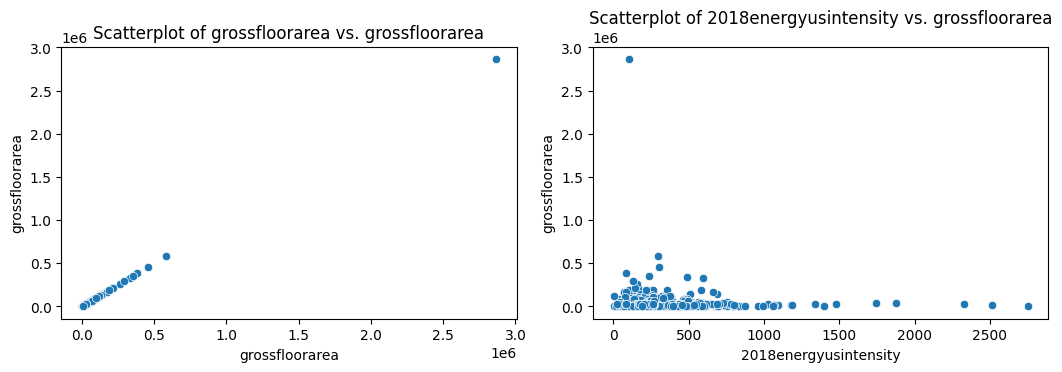

In [9]:
#checking for outliers in the data through scatterplot diagram
num_columns = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(16, 10))

for i, column in enumerate(num_columns):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=column, y='grossfloorarea', data=df)
    plt.title(f'Scatterplot of {column} vs. grossfloorarea')

plt.tight_layout()
plt.show()

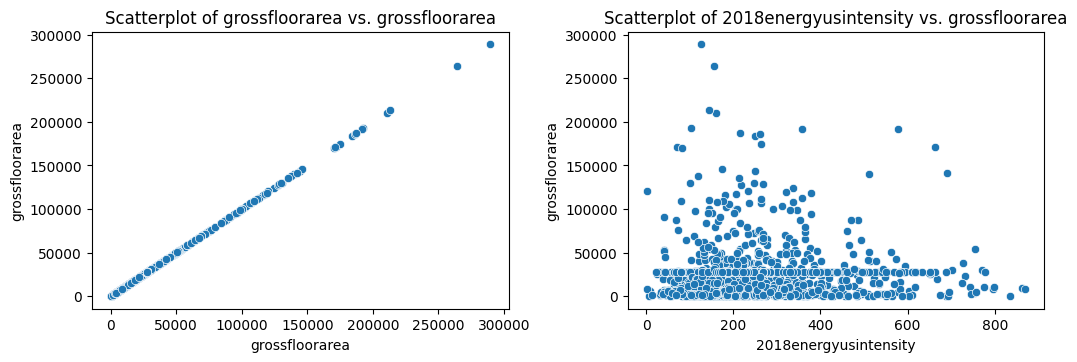

In [10]:
zscorestest = df.select_dtypes(include=np.number).apply(zscore)

outliers = zscorestest[np.abs(zscorestest) > 3].dropna(how='all').index

newdf = df.drop(outliers)

numcolumns = newdf.select_dtypes(include=np.number).columns

plt.figure(figsize=(16, 10))

for i, column in enumerate(numcolumns):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=column, y='grossfloorarea', data=newdf)
    plt.title(f'Scatterplot of {column} vs. grossfloorarea')

plt.tight_layout()
plt.show()


First 20 rows of the dataset after scaling:
                buildingname                           buildingaddress  \
0                   HEXACUBE         160 CHANGI ROAD, SINGAPORE 419728   
1                        NaN                                       NaN   
2           CITY SQUARE MALL      180 KITCHENER ROAD, SINGAPORE 208539   
3             REPUBLIC PLAZA         9 RAFFLES PLACE, SINGAPORE 048619   
4               CENTRAL MALL         1 MAGAZINE ROAD, SINGAPORE 059567   
5                      KINEX  11 TANJONG KATONG ROAD, SINGAPORE 437157   
6              UNITED SQUARE        101 THOMSON ROAD, SINGAPORE 307591   
7              TIALOC CENTRE   731 NORTH BRIDGE ROAD, SINGAPORE 198699   
8                  HPL HOUSE        50 CUSCADEN ROAD, SINGAPORE 249724   
9                        NaN      69 KEONG SAIK ROAD, SINGAPORE 089165   
10              CMO BUILDING    50 SOUTH BRIDGE ROAD, SINGAPORE 058682   
11                       NaN     1 LORONG 14 GEYLANG, SINGAPORE 3989

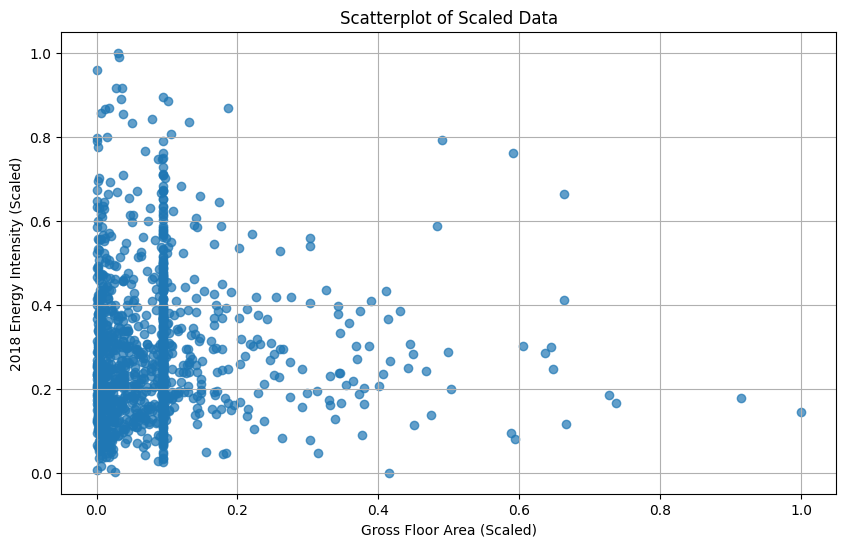

In [11]:
#Scaling of the data
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()

newdf['grossfloorarea'] = newdf['grossfloorarea'].replace(',', '', regex=True).astype(float)

numcols = ['grossfloorarea', '2018energyusintensity']

newdf[numcols] = scaler.fit_transform(newdf[numcols])

print("First 20 rows of the dataset after scaling:")
print(newdf.head(20))

plt.figure(figsize=(10, 6))

plt.scatter(newdf['grossfloorarea'], newdf['2018energyusintensity'], alpha=0.7)
plt.title('Scatterplot of Scaled Data')
plt.xlabel('Gross Floor Area (Scaled)')
plt.ylabel('2018 Energy Intensity (Scaled)')
plt.grid(True)
plt.show()

In [12]:
#Encoding of the data (greenmakstatus and buildingsize)
newdf['greenmarkstatus'] = newdf['greenmarkstatus'].replace({'Yes': 1, 'No': 0})

newdf['buildingsize'] = newdf['buildingsize'].replace({'Small': 0, 'Large': 1})

print("First 20 rows of the dataset after encoding:")
print(newdf.head(20))

First 20 rows of the dataset after encoding:
                buildingname                           buildingaddress  \
0                   HEXACUBE         160 CHANGI ROAD, SINGAPORE 419728   
1                        NaN                                       NaN   
2           CITY SQUARE MALL      180 KITCHENER ROAD, SINGAPORE 208539   
3             REPUBLIC PLAZA         9 RAFFLES PLACE, SINGAPORE 048619   
4               CENTRAL MALL         1 MAGAZINE ROAD, SINGAPORE 059567   
5                      KINEX  11 TANJONG KATONG ROAD, SINGAPORE 437157   
6              UNITED SQUARE        101 THOMSON ROAD, SINGAPORE 307591   
7              TIALOC CENTRE   731 NORTH BRIDGE ROAD, SINGAPORE 198699   
8                  HPL HOUSE        50 CUSCADEN ROAD, SINGAPORE 249724   
9                        NaN      69 KEONG SAIK ROAD, SINGAPORE 089165   
10              CMO BUILDING    50 SOUTH BRIDGE ROAD, SINGAPORE 058682   
11                       NaN     1 LORONG 14 GEYLANG, SINGAPORE 398

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

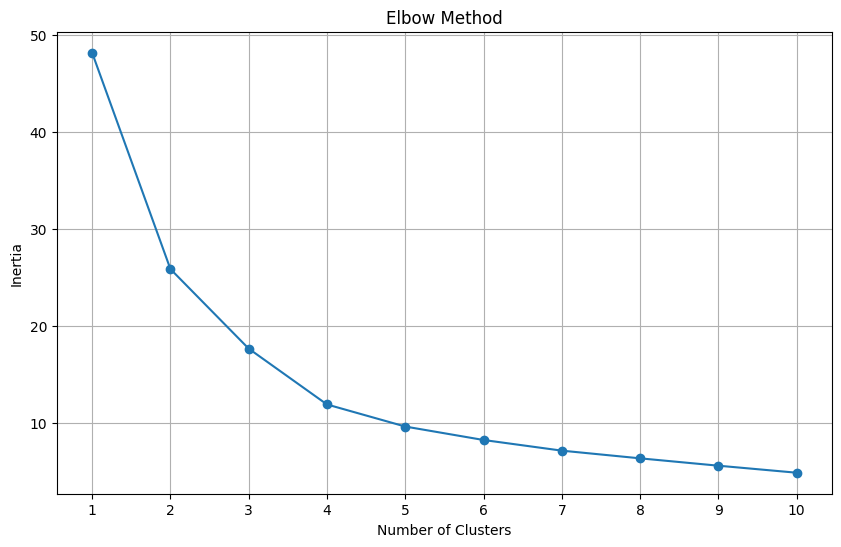

In [13]:
# Elbow Method to Determine the range of clusters to test
from sklearn.cluster import KMeans
maxclusters = 10
inertia = []

for i in range(1, maxclusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(newdf[['grossfloorarea', '2018energyusintensity']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, maxclusters + 1), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, maxclusters + 1))
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-17-860a96d951a5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodataoutliersdf['cluster'] = kmeanscleaned.labels_


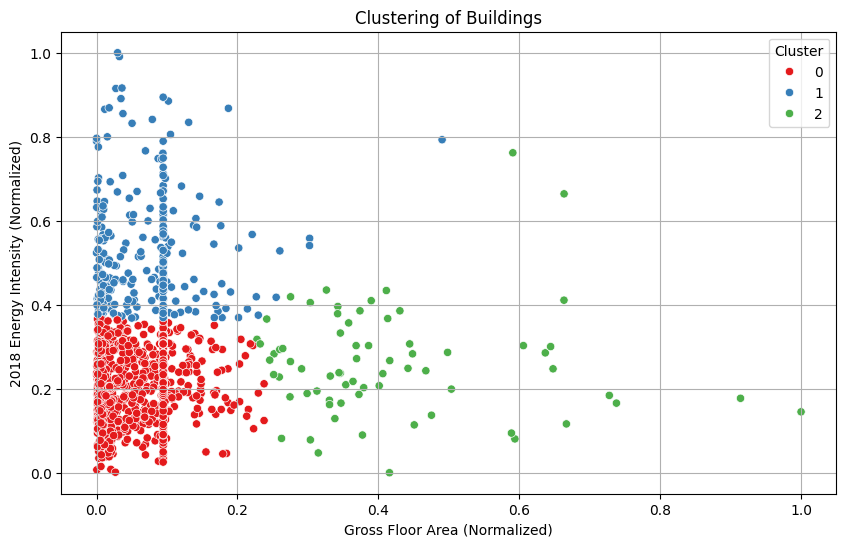

In [17]:
from sklearn.cluster import KMeans
import numpy as np
elbow_point = 3
kmeans = KMeans(n_clusters=elbow_point, random_state=42)
kmeans.fit(newdf[['grossfloorarea', '2018energyusintensity']])

newdf['cluster'] = kmeans.labels_

distance = kmeans.transform(newdf[['grossfloorarea', '2018energyusintensity']])

threshold = np.mean(distance) + 2 * np.std(distance)

outliers = np.where(distance > threshold)[0]

nodataoutliersdf = newdf[~newdf.index.isin(outliers)]

kmeanscleaned = KMeans(n_clusters=elbow_point, random_state=42)
kmeanscleaned.fit(nodataoutliersdf[['grossfloorarea', '2018energyusintensity']])

nodataoutliersdf['cluster'] = kmeanscleaned.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='grossfloorarea', y='2018energyusintensity', hue='cluster', data=nodataoutliersdf, palette='Set1', legend='full')
plt.title('Clustering of Buildings')
plt.xlabel('Gross Floor Area (Normalized)')
plt.ylabel('2018 Energy Intensity (Normalized)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

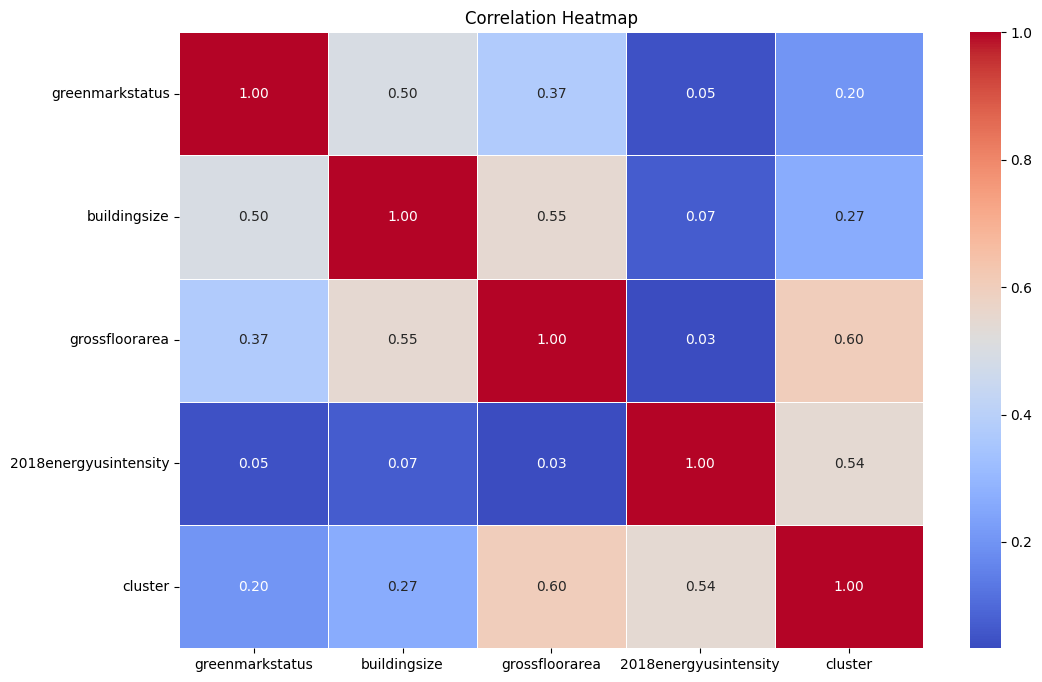

In [18]:
encodeddf = pd.get_dummies(nodataoutliersdf)

numdf = encodeddf.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numdf.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [36]:

target = encodeddf.corr()['2018energyusintensity'].abs().sort_values(ascending=False)

# Select features with correlation greater than a threshold (e.g., 0.5)
selectedfeaturest = target[target > 0.5].index.tolist()

featuredmatrix = encodeddf[selectedfeaturest].corr().abs()

# Create a mask to ignore the diagonal values
mask = np.triu(np.ones_like(featuredmatrix, dtype=bool))

highcorrelation = featuredmatrix[mask].stack().sort_values(ascending=False)
highcorrelation = highcorrelation[highcorrelation > 0.7].reset_index()

selectedfeaturecorrelation = []
for _, (feature1, feature2, correlation) in highcorrelation.iterrows():
    if feature1 not in selectedfeaturecorrelation and feature2 not in selectedfeaturecorrelation:
        selectedfeaturecorrelation.append(feature1)

selected = list(set(selectedfeaturest + [feature for feature in selectedfeaturecorrelation if feature not in encodeddf.index.names and encodeddf.columns[encodeddf.columns == feature].dtype != 'object']))


print("Selected Features:")
print(selected)

Selected Features:
['cluster', '2018energyusintensity']


Some of the features were discarded as they had low corelation with the targeted feature, so they were dropped, only cluster had the higest correlation with the targeted feature, that is why it was selected

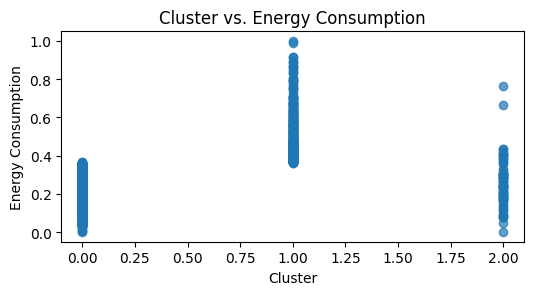

In [37]:
import matplotlib.pyplot as plt

# Define the features to plot
features = selected.copy()
features.remove('2018energyusintensity')  # Remove the target variable

# Plot scatter plots for each selected feature against energy consumption
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, start=1):
    plt.subplot(3, 3, i)
    plt.scatter(nodataoutliersdf[feature], nodataoutliersdf['2018energyusintensity'], alpha=0.7)
    plt.title(f'{feature.capitalize()} vs. Energy Consumption')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Energy Consumption')

plt.tight_layout()
plt.show()


In [21]:
from sklearn.model_selection import train_test_split

X = nodataoutliersdf['grossfloorarea']
y = nodataoutliersdf['2018energyusintensity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
import numpy as np

arr = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

arr = np.random.rand(10, 5)

print("Training set:")
print(X_train[:3])
print(y_train[:3])

print("\nTesting set:")
print(X_test[:3])
print(y_test[:3])

Training set:
865     0.094600
1155    0.006167
197     0.055339
Name: grossfloorarea, dtype: float64
865     0.652474
1155    0.130035
197     0.293441
Name: 2018energyusintensity, dtype: float64

Testing set:
669    0.09460
235    0.09460
726    0.01393
Name: grossfloorarea, dtype: float64
669    0.073648
235    0.652474
726    0.081703
Name: 2018energyusintensity, dtype: float64


In [23]:
from sklearn.linear_model import LinearRegression

X_train_array = X_train.to_numpy().reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X_train_array, y_train)

print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Coefficients: [0.04739316]
Intercept: 0.2843747859797622


In [24]:
#Checking the accuracy of linear regression through mse and r^2
from sklearn.metrics import mean_squared_error, r2_score

X_test = X_test.to_numpy()

X_test = X_test.reshape(-1, 1)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Predictions:")
print(y_pred[:5])
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

Predictions:
[0.28885816 0.28885816 0.28503497 0.28526296 0.2907772 ]
Mean Squared Error:  0.026114382561151662
R-squared:  -0.004717629887527552


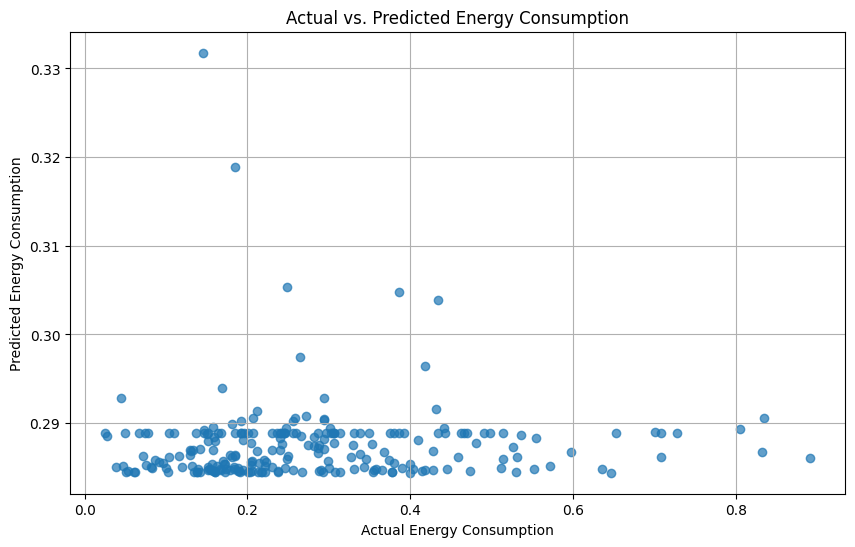

In [25]:
import matplotlib.pyplot as plt

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs. Predicted Energy Consumption')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.grid(True)
plt.show()

In [26]:
#Neural Networking through FNN using relu as an activation function
import tensorflow as tf

encodeddf.dropna(inplace=True)

X = encodeddf.drop(columns=['2018energyusintensity'])
y = encodeddf['2018energyusintensity']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

y_pred = model.predict(X_test)

print("Predictions:")
print(y_pred[:5])


Epoch 1/100
12/12 [==============================] - 3s 46ms/step - loss: 0.0365 - val_loss: 0.0187
Epoch 2/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0142 - val_loss: 0.0168
Epoch 3/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0077 - val_loss: 0.0166
Epoch 4/100
12/12 [==============================] - 0s 14ms/step - loss: 0.0046 - val_loss: 0.0160
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0037 - val_loss: 0.0172
Epoch 6/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0027 - val_loss: 0.0174
Epoch 7/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0023 - val_loss: 0.0173
Epoch 8/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0020 - val_loss: 0.0198
Epoch 9/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0020 - val_loss: 0.0179
Epoch 10/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0019 - val_loss: 0.0187
E

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

7/7 [==============================] - 0s 3ms/step
Root Mean Squared Error (RMSE): 0.13123732337924462
Mean Absolute Error (MAE): 0.09241880644938884
R-squared (R2): 0.36573855741619077


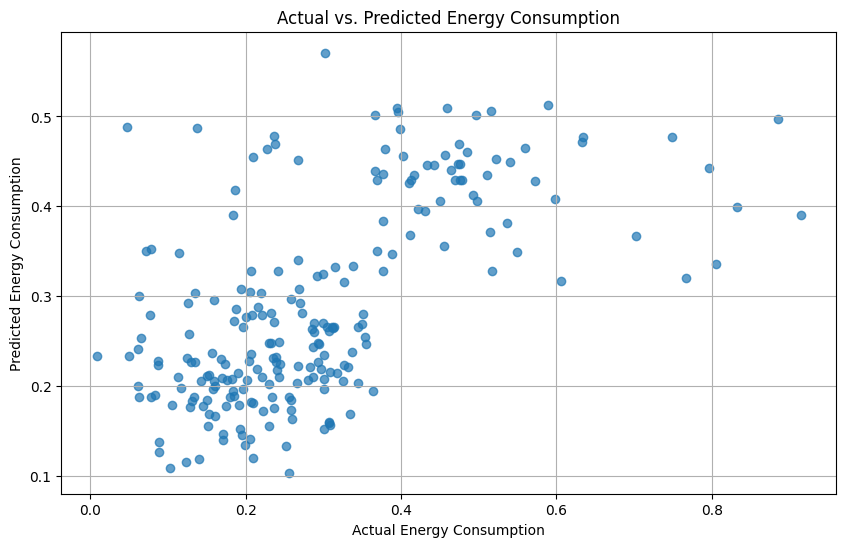

In [28]:
import matplotlib.pyplot as plt

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs. Predicted Energy Consumption')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.grid(True)
plt.show()

In [29]:
#FNN with sigmoid
encodeddf.dropna(inplace=True)

X = encodeddf.drop(columns=['2018energyusintensity'])
y = encodeddf['2018energyusintensity']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

y_pred = model.predict(X_test)

print("Predictions:")
print(y_pred[:5])


Epoch 1/100
12/12 [==============================] - 1s 24ms/step - loss: 0.1818 - val_loss: 0.0318
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0462 - val_loss: 0.0238
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0302 - val_loss: 0.0232
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0226 - val_loss: 0.0238
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0171 - val_loss: 0.0201
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0142 - val_loss: 0.0190
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0113 - val_loss: 0.0191
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0093 - val_loss: 0.0181
Epoch 9/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.0173
Epoch 10/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0065 - val_loss: 0.0179
Epoch 11

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


7/7 [==============================] - 0s 3ms/step
Root Mean Squared Error (RMSE): 0.1301022808317693
Mean Absolute Error (MAE): 0.0907754138777918
R-squared (R2): 0.3766622873112152


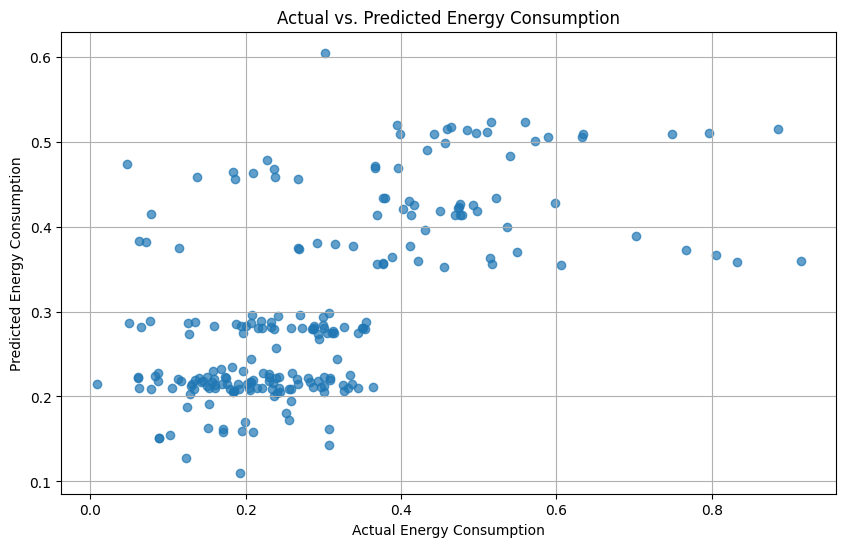

In [31]:
import matplotlib.pyplot as plt

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs. Predicted Energy Consumption')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.grid(True)
plt.show()

In [32]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

y_pred = model.predict(X_test)

print("Predictions:")
print(y_pred[:5])


Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 16.6651 - val_loss: 16.2900
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 16.0239 - val_loss: 15.6567
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 15.3959 - val_loss: 15.0365
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 14.7810 - val_loss: 14.4290
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 14.1789 - val_loss: 13.8348
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 13.5897 - val_loss: 13.2533
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 13.0138 - val_loss: 12.6853
Epoch 8/100
12/12 [==============================] - 0s 9ms/step - loss: 12.4512 - val_loss: 12.1302
Epoch 9/100
12/12 [==============================] - 0s 7ms/step - loss: 11.9011 - val_loss: 11.5878
Epoch 10/100
12/12 [==============================] - 0s 9ms/step - loss: 11.3643 - val_lo

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


7/7 [==============================] - 0s 3ms/step
Root Mean Squared Error (RMSE): 0.15714396640053033
Mean Absolute Error (MAE): 0.11434890220822758
R-squared (R2): 0.09061245030236664


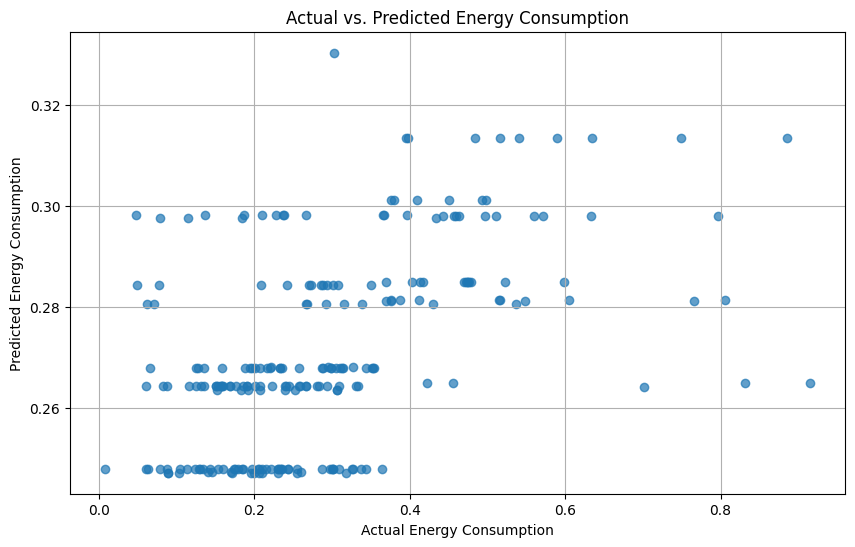

In [34]:
import matplotlib.pyplot as plt

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs. Predicted Energy Consumption')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.grid(True)
plt.show()

Comparison of Linear Aggression with Neural Network:

Linear Regression Mean Squared Error:  0.026816670876257154

Neural Network Mean Squared Error: 0.01796753704547882

The mean square error that we are getting from Neural Network is lesser than the mean squared error of Linear Regression, indicating that Neural Network provides us with more accuracy than Linear Regression


To analyze the performance of the energy consumption prediction model and interpret evaluation metrics we are going to compare the values of the following:

Values of MSE,R^2,MAE and RMSE of Forward Neural Networking with Relu activation function, Forward Neural Networking with Sigmoid Activation Function and Forward Neural Networking with regularization.

***Values of Forward Neural Networking with Relu:***

Mean Squared Error: 0.017174135893583298

Root Mean Squared Error (RMSE): 0.13105013612879848

Mean Absolute Error (MAE): 0.0911200912419904

R-squared (R2): 0.3675465946678177

***Values of Forward Neural Networkig with Sigmoid:***

Mean Squared Error: 0.016841430217027664

Root Mean Squared Error (RMSE): 0.1297745406685392

Mean Absolute Error (MAE): 0.090748868613671

R-squared (R2): 0.3797988270518773

***Values of Forward Neural Networking with Regularization***

Mean Squared Error: 0.43195095658302307

Root Mean Squared Error (RMSE): 0.160655567289914

Mean Absolute Error (MAE): 0.11853451761381183

R-squared (R2): 0.049515273528122905

Mean Squared Error (MSE): This metric measures the average of the squares of the errors between the predicted and actual values.In this case lower the value better the performance performance. In this case, the models with Relu and Sigmoid activation functions have relatively low MSE values compared to the regularization model, indicating better predictive accuracy in the models.

Root Mean Squared Error (RMSE): RMSE is the square root of MSE and provides an interpretable scale similar to the target variable. Lower the values better
the performance. Both Relu and Sigmoid models have similar and lower RMSE values compared to the regularization model, indicating better predictive accuracy.

Mean Absolute Error ( MAE): MAE measures the average of the absolute differences between the predicted and actual values. Lower the values better  the performance. Again, both Relu and Sigmoid models have similar and lower MAE values compared to the regularization model, indicating better predictive accuracy.

R-squared (R2): R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables.In this case higher values (closer to 1) the better the fit. The Relu and Sigmoid models have higher R2 values compared to the regularization model, indicating better fit and explanatory power of the model.

In summary, based on these evaluation metrics, the models with Relu and Sigmoid activation functions outperform the model with regularization in terms of predictive accuracy and model fit. Therefore, either the Relu or Sigmoid model would be preferred for predicting energy consumption.

The performance of energy consumption prediction models is crucial for effective building management, offering several key benefits:

Optimizing Energy Usage: Accurate predictions enable managers to plan and adjust energy usage efficiently, optimizing operational schedules and HVAC systems.

Identifying Energy-Efficient Buildings: Models can pinpoint buildings performing exceptionally well, guiding investments in energy-efficient technologies and setting benchmarks for performance.

Reducing Environmental Impact: Energy-efficient buildings contribute to lower greenhouse gas emissions, supporting sustainability goals and mitigating climate change.

Cost Savings: Improved efficiency leads to lower energy bills and operational costs, freeing up resources for further efficiency measures or building upgrades.

Compliance and Regulation: Accurate predictions help ensure compliance with energy regulations and standards, potentially qualifying buildings for incentives and certification programs.

Overall, the performance of energy consumption models directly impacts building management by enabling efficient energy use, identifying opportunities for improvement, and aligning with sustainability objectives.